In [1]:
import pandas as pd
import numpy as np
import main as sigmod
import similar_feature_grouping as similar_feature_grouping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gunesyurdakul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset_path="../datasets/2013_camera_specs/"

In [3]:
dataset_df = sigmod.create_brand_dataframe(dataset_path)
dataset_df = sigmod.compute_brand_blocking(dataset_df)
#pairs_df = sigmod.get_block_pairs_df(dataset_df)

  0%|          | 0/24 [00:00<?, ?it/s]

>>> Creating dataframe...



100%|██████████| 24/24 [00:02<00:00,  7.43it/s]
508it [00:00, 5075.64it/s]

>>> Dataframe created successfully!

>>> Computing blocking...


29787it [00:04, 6037.78it/s]


ended
>>> Blocking computed successfully!



In [4]:
dataset_df.head(50)

dataset_df = dataset_df.explode('blocking_key')
grouped_df = dataset_df.groupby(['blocking_key']).size()
grouped_df

blocking_key
aiptek         11
allen           1
argus           8
b+w            25
bell+howell    10
               ..
vtech          10
walimex         1
wespro          4
wildgame        1
yourdeal        9
Length: 74, dtype: int64

### GROUPING SAME PRODUCTS FROM LABELLED SET

In [5]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')

In [6]:
same_products = sigmod.grouping_same_products_from_labelled_set(labelled_df)

In [7]:
#They all represent the same products
same_products[4]

['www.ebay.com//56162',
 'www.ebay.com//24351',
 'www.ebay.com//54765',
 'www.ebay.com//55908',
 'www.ebay.com//60673',
 'www.ebay.com//56369',
 'buy.net//6028',
 'www.ebay.com//53352',
 'www.ebay.com//47469',
 'www.shopmania.in//1605',
 'www.ebay.com//60549',
 'www.ebay.com//43731',
 'www.ebay.com//43228',
 'www.ebay.com//42433',
 'www.ebay.com//60231',
 'www.ebay.com//46807',
 'buy.net//6201',
 'www.ebay.com//43306',
 'www.ebay.com//54351',
 'www.ebay.com//46682',
 'www.ebay.com//54625',
 'www.ebay.com//45309',
 'www.ebay.com//44553',
 'www.ebay.com//60479',
 'www.ebay.com//45557',
 'www.ebay.com//42268',
 'www.buzzillions.com//2163',
 'www.priceme.co.nz//1746',
 'www.ebay.com//46644',
 'www.ebay.com//44570',
 'www.camerafarm.com.au//749',
 'www.gosale.com//1442',
 'www.gosale.com//1469',
 'www.ebay.com//59174',
 'www.ebay.com//55230',
 'www.ebay.com//54358',
 'www.ebay.com//53117',
 'www.ebay.com//52889',
 'www.ebay.com//24887',
 'www.ebay.com//55066',
 'www.ebay.com//54119',
 'www.

### GET ALL KEYS and values

In [8]:
data_dict=sigmod.get_all_keys_values(dataset_path)
dataset_df['all_features'] = dataset_df['spec_id'].apply(lambda x: data_dict[x])

100%|██████████| 24/24 [00:02<00:00,  9.27it/s]


In [9]:
dataset_df.head()

,source,spec_number,spec_id,page_title,brand,blocking_key,all_features
0,www.wexphotographic.com,154,www.wexphotographic.com//154,nikon coolpix aw120 digital camera - camouflag...,,coolpix,"{'resolution': '4608 x 3456', 'file formats': ..."
1,www.wexphotographic.com,553,www.wexphotographic.com//553,canon ixus 150 digital camera - red (9148b007a...,,canon,"{'pictbridge': 'Yes', 'resolution': '4608 x 34..."
2,www.wexphotographic.com,601,www.wexphotographic.com//601,fuji finepix s1 digital camera (p10nc12730a) -...,,fujifilm,"{'pictbridge': 'Yes', 'resolution': '4608 Ã 3..."
3,www.wexphotographic.com,197,www.wexphotographic.com//197,nikon coolpix s5300 digital camera - black (vn...,,coolpix,"{'resolution': '4608 x 3456', 'file formats': ..."
4,www.wexphotographic.com,178,www.wexphotographic.com//178,fuji finepix s8600 digital camera - red (p10nc...,,fujifilm,"{'pictbridge': 'Yes', 'resolution': '4608 Ã 3..."


In [10]:
all_text=similar_feature_grouping.prepare_text_for_word2vec(data_dict)

0.0
0.03357169234901131
0.06714338469802263
0.10071507704703395
0.13428676939604525
0.16785846174505656
0.2014301540940679
0.2350018464430792
0.2685735387920905
0.3021452311411018
0.3357169234901131
0.3692886158391244
0.4028603081881358
0.4364320005371471
0.4700036928861584
0.5035753852351698
0.537147077584181
0.5707187699331924
0.6042904622822036
0.637862154631215
0.6714338469802262
0.7050055393292376
0.7385772316782488
0.7721489240272602
0.8057206163762716
0.8392923087252828
0.8728640010742942
0.9064356934233054
0.9400073857723168
0.973579078121328


In [10]:
from gensim.models import Word2Vec

In [22]:
emb_dim=200
model = Word2Vec(all_text, size=emb_dim, window=5, min_count=1, workers=4)
model.train(all_text,total_examples=model.corpus_count,epochs=model.epochs)

(305747567, 383112865)

In [23]:
model.most_similar('supply ability')

/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('minorder quantity', 0.8495299816131592),
 ('items per carton', 0.7159503102302551),
 ('moq', 0.6428205966949463),
 ('create a shooting system as unique as you are', 0.5759508609771729),
 ('production capacity', 0.564896821975708),
 ('maximum shutter speed', 0.5645127296447754),
 ('self timer delay', 0.5523697137832642),
 ('unit per carton', 0.5463217496871948),
 ('full hd movie recording', 0.5408480763435364),
 ('use with all ef and efs lenses', 0.5320674777030945)]

In [28]:
model.save('word2vec_200_features')

### GROUPING FEATURES

In [11]:
all_features={}
for features in data_dict.values():
    for feature in features.keys():
        if feature not in all_features.keys():
            all_features[feature]=0            
        all_features[feature]+=1

In [12]:
all_features_filtered=[feature for feature,count in all_features.items() if count>200]

In [13]:
len(all_features_filtered)

364

### CLUSTERING

In [14]:
model= Word2Vec.load('word2vec_200_features')
words = all_features_filtered
wvs = model.wv[words]


In [15]:
wvs.shape

(364, 200)

### TSNE

In [16]:
# visualize embeddings
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=20)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words



In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

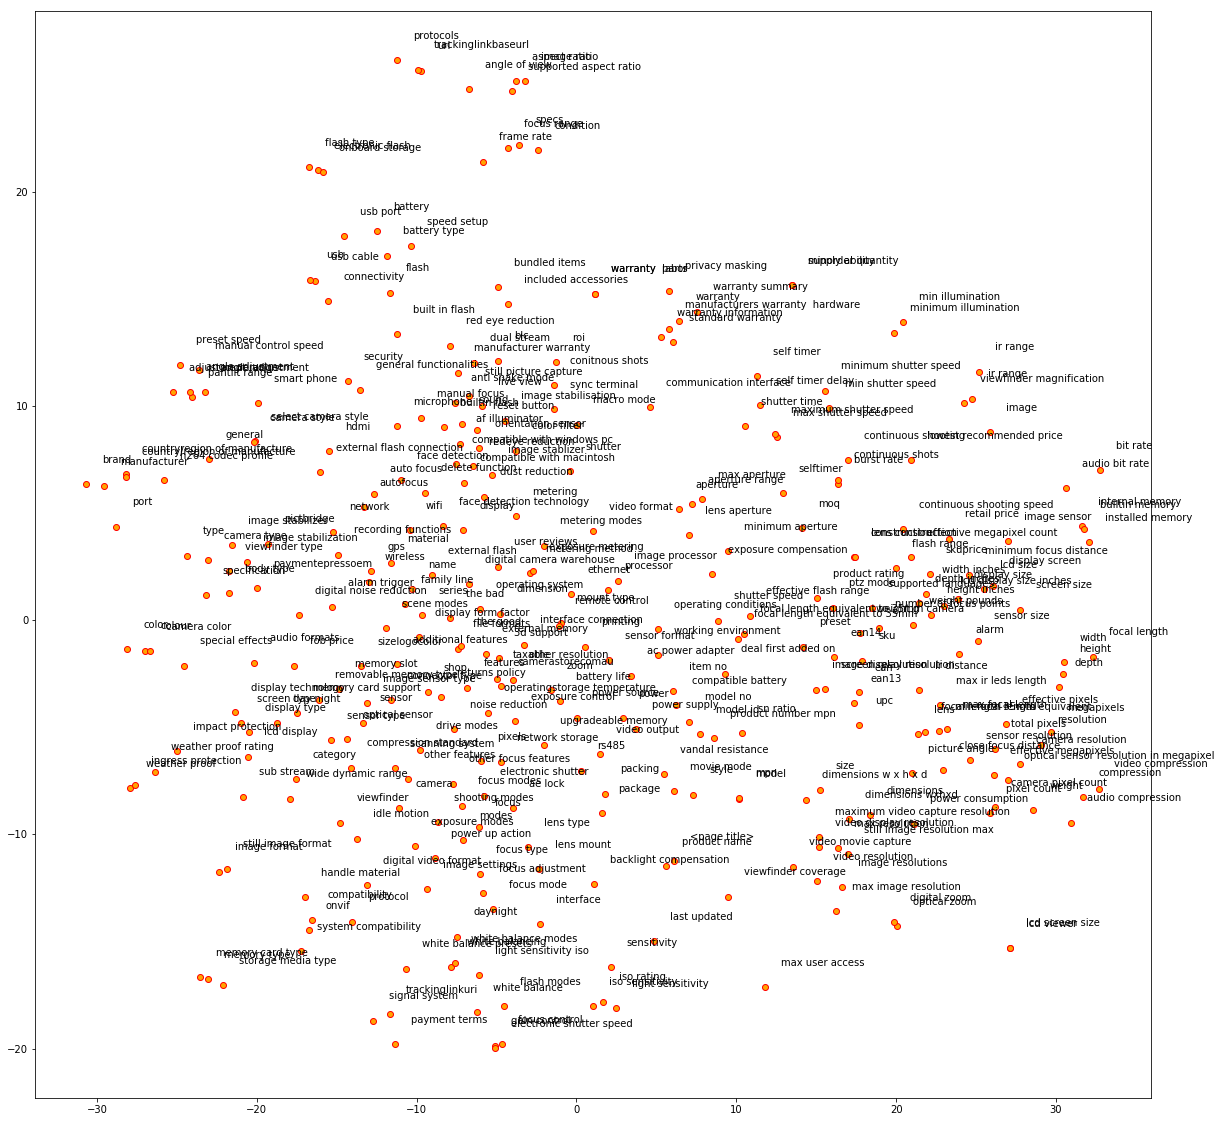

In [18]:
plt.show()

In [19]:
T.shape

(364, 2)

#### KMeans

In [20]:
from nltk.cluster import KMeansClusterer
import nltk
%matplotlib inline

In [21]:
NUM_CLUSTERS=50
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, avoid_empty_clusters=True,repeats=25)
assigned_clusters = kclusterer.cluster(T, assign_clusters=True)

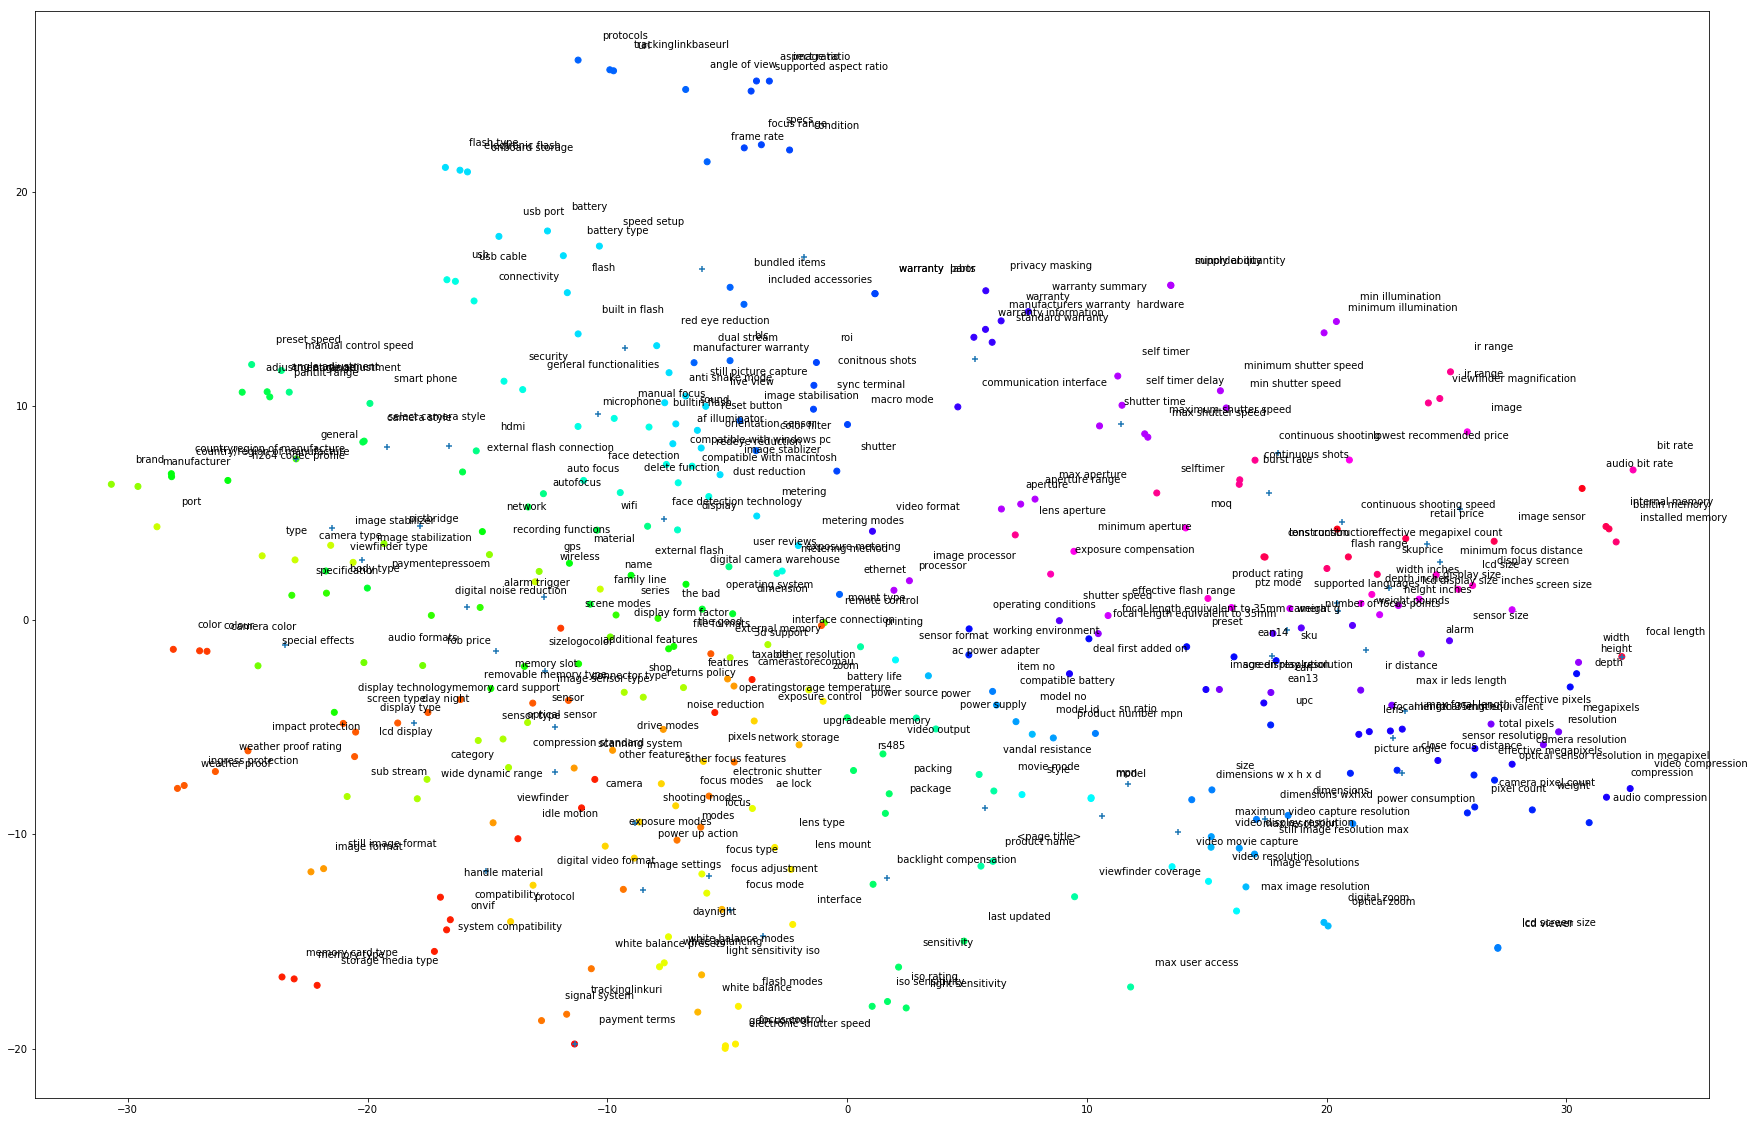

In [22]:
plt.figure(figsize=(30,20))
plt.scatter(T[:,0], T[:,1], c=assigned_clusters, cmap='hsv')
plt.scatter(np.array(kclusterer.means())[:,0], np.array(kclusterer.means())[:,1], marker='+', cmap='hsv')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [23]:
dataset_df = similar_feature_grouping.get_grouped_features(dataset_df,assigned_clusters,labels)

In [24]:
dataset_df = dataset_df.set_index('spec_id')

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
dataset_df.loc[same_products[1]]

,source,spec_number,page_title,brand,blocking_key,all_features,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
spec_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
www.ebay.com//55574,www.ebay.com,55574,nikon 1 j1 10 1 mp digital camera white body o...,Nikon,nikon,{'<page title>': 'Nikon 1 J1 10 1 MP Digital C...,,,,,,,,,,,Mirrorless Interchangeable Lens,,Nikon,,,,,,,,,,Nikon 1 J1 10 1 MP Digital Camera White Body O...,,,34202 J1,,,,,Strap (Neck or Wrist),Used: An item that has been used previously. T...,018208922529,,,,,10.1 MP,,,"3""",,,,,,,,,
www.ebay.com//46330,www.ebay.com,46330,nikon 1 j1 digital camera w 10 30mm lens black...,Nikon,nikon,{'metering method': 'Center-weighted average m...,,32 to 104Â°F (0 to 40Â°C)Humidity: 0 - 85%,,,,,,"Modes: Aperture Priority, Auto, Manual, Shutte...",,"Auto, Cloudy, Flash, Fluorescent, Incandescent...",Yes Mirrorless Interchangeable Lens,,Nikon,,,,,,,Yes,100-6400,,Nikon 1 J1 Digital Camera w 10 30mm Lens Black...,"Center-weighted average metering, Multi-zone m...",,27526 J1,1x EN-EL20 Rechargeable Lithium-Ion Battery Pack,EH-5b (Optional) 3x,,,"Case or Bag, Extra Battery, Extra Battery Char...",Type: ElectronicSpeed: 1/3 - 1/16000 sec Manuf...,4.1 oz (116 g) 018208131198,,,,,10.1 MP,,Maximum: f/3.5Minimum: f/16,"3""",,,"7.87"" (19.99 cm)",,,,,10 - 30 mm Comparable Nikon CX Format Focal Le...,
www.shopbot.com.au//409,www.shopbot.com.au,409,nikon 1 j1 / 10-30mm & 30-110mm kit - price co...,,nikon,{'<page title>': 'Nikon 1 J1 / 10-30mm & 30-11...,,,,,,,,,,,,Product Name» Show All Product Descriptions Pr...,,,,,,"NSW, VIC, QLD",,,,,Nikon 1 J1 / 10-30mm & 30-110mm Kit - Price co...,,,,,,,,,,,,,,,,,,,,,,,,,,,
www.ebay.com//57029,www.ebay.com,57029,nikon 1 j1 10 1 mp hd digital camera kit with ...,Nikon,nikon,{'<page title>': 'Nikon 1 J1 10 1 MP HD Digita...,,,"['White', 'White']",,,,,,,,Mirrorless Interchangeable Lens,,Nikon Nikon,,,,,,,,,,Nikon 1 J1 10 1 MP HD Digital Camera Kit with ...,,,27528B Nikon 1 J1,,3x,,,,Used: An item that has been used previously. T...,,,VR 10-30mm Lens,,,"['10.1 MP\nModel:\nJ1', '10.1']",,,"3""",,,,,,,,,
www.ebay.com//52867,www.ebay.com,52867,nikon 1 j1 10 1 mp digital camera red kit w vr...,Nikon,nikon,{'<page title>': 'Nikon 1 J1 10 1 MP Digital C...,,,,,,,,,,,Mirrorless Interchangeable Lens,,Nikon,,,,,,,,,,Nikon 1 J1 10 1 MP Digital Camera Red Kit w VR...,,,27553 J1,,,,,,Used: An item that has been used previously. T...,018208275533,,,,,10.1 MP,,,"3""",,,,,,,,,
www.ebay.com//52749,www.ebay.com,52749,nikon 1 j1 10 1 mp digital camera black kit w ...,Nikon,nikon,{'<page title>': 'Nikon 1 J1 10 1 MP Digital C...,,,,,,,,,,,Mirrorless Interchangeable Lens,,Nikon,,,,,,,,,,Nikon 1 J1 10 1 MP Digital Camera Black Kit w ...,,,27526 J1,,3x,,,Extra Battery Charger,Used: An item that has been used previously. T...,,,,,,10.1 MP,,,"3""",,,,,,,,,
www.ebay.com//45973,www.ebay.com,45973,nikon 1 j1 10 1 mp digital camera white kit w ...,Nikon,nikon,{'<page title>': 'Nikon 1 J1 10 1 MP Digital C...,,,,,,,,,,,Mirrorless Interchangeable Lens,,Nikon,,,,,,,,,,Nikon 1 J1 10 1 MP Digital Camera White Kit w ...,,,27528B J1,,3x,,,,Used: An item that has been used previously. T...,,,,,,10.1 MP,,,"3""",,,,,,,,,
buy.net//6594,buy.net,6594,nikon j1 silver digital camera kit w/ 10-30mm ...,,nikon,{'<page title>': 'Nikon J1 Silver Digital Came...,,,,Secure Digital (SD) Card|Secure Digital High C...,,,,,Nikon 1-mount,,Mirrorless Camera Optical,,,,,,,,,,,,Nikon J1 Silver Digital Camera Kit W/ 10-30mm ...,,,,Slow Sync|Rear Curtain Sync|Red-eye Reduction,3 X,1920 x 1080,3 in,http://www.nikon.com,,10.1 Megapixel 8.25 oz,1.2 in 2.4 in,,1 Year Limited,,,4.2 in,,,,,,,,,CMOS,10 mm to 30 mm (Lens 1),
www.shopmania.in//1450,www.shopmania.in,1450,"nikon 1 j1 digital camera prices, shopping com...",Nikon,nikon,"{'resolution': '10.1 MP', 'image processor': '...",,SD / SDHC / SDXC,,LCD Yes USB / mini HDM

##  grouped_df

In [31]:
grouped_df = dataset_df.groupby(['blocking_key'])

In [37]:
grouped_df.get_group('nikon')

,source,spec_number,page_title,brand,blocking_key,all_features,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
spec_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
www.price-hunt.com//9551,www.price-hunt.com,9551,nikon performance p330 point & shoot camera be...,Nikon,nikon,"{'supported aspect ratio': '4:3', 'sales packa...",,SD,White,,,Jpeg,Yes::32gb,,Nikkor F/1.8 Lens Auto-on,,Point & Shoot,CMOS,Nikon,,,Performance,,,,,,HDMI Mini Connector,Nikon Performance P330 Point & Shoot Camera be...,,Hi-Speed USB 2.0,,Li-ion Battery Built in Flash,1920 x 1080 P330 5x 2x,,3 Inch,,4:3,200 g 12.2 Megapixels,,"921,000 Dots",MPEG-4 2 Years Nikon India Warranty,,,,F/1.8-5.6 1/2000 sec 60 sec,,,,,,Yes::10 fps,,,") mm, 5.1 (w) -25.5 (t",
www.price-hunt.com//732,www.price-hunt.com,732,nikon d610 dslr camera best price in india 201...,Nikon,nikon,"{'pictbridge': 'Pictbridge', 'maximum shutter ...",,SD / SDHC / Sdxc Fx (36 x 24) Image Area: 4512...,Black,TFT LCD,,"Jpeg, dcf 2.0, Dpof, Exif 2.3, nef (Raw) + Jpe...",Upgradeable Memory,"['Auto, Portrait, Child, Close_up, Night Portr...","Red-eye Reduction, Auto with Red-eye Reduction...","Auto (2 Types), Incandescent, Fluorescent (7 T...",DSLR,CMOS,Pictbridge Nikon,Linear pcm,,,"24.47 Total Megapixels, Nikon f Mount (with af...",External Flash,,,Iso 100 - 6400,Ttl Phase Detection Type c Mini-pin HDMI,AC Adapter eh-5b Nikon D610 DSLR Camera best p...,,"Hi-Speed USB Image Sensor Cleaning, Image Dust...",,Lithium Battery Built in Flash Matrix: 3d Colo...,"1920 x 1080, 30p D610",,3.2 Inch 141 (w) x 113 (h) x 82 (d) mm,,Sync Terminal,850 g (with Battery and Memory Card but Withou...,,"921,000 Dots","H.264, MPEG-4 Avc, mov 2 Year Nikon India Warr...",35.9 x 24.0 mm,,,"1/4000 sec 5, 10 and 20 Sec, 2 30 sec",26,,,,,"Continuous Shots, 1 - 5 fps (Continuous low Sp...",,,,
www.price-hunt.com//786,www.price-hunt.com,786,nikon d600 dslr camera best price in india 201...,Nikon,nikon,"{'pictbridge': 'Pictbridge', 'face detection':...",,SD / SDHC / Sdxc Fx (36 x 24) Image Area: 4512...,Black,TFT LCD,,"Jpeg, dcf 2.0, Dpof, Exif 2.3, nef (Raw) Jpeg,...",Upgradeable Memory,"['Auto, Portrait, Child, Close up, Night Portr...","Red-eye Reduction, Auto Slow Sync, Auto Slow S...","Auto (2 Types), Incandescent, Fluorescent (7 T...",DSLR,CMOS,Pictbridge Nikon,Linear pcm,,,"24.47 Million Total Pixels, Nikon f Mount (wit...",,"Mac OS 10.5.8, Windows Vista Sp2, Windows 7 Sp...",,Iso 100 - 6400,Ttl Phase Detection Type c Mini-pin HDMI,AC Adapter eh-5b Nikon D600 DSLR Camera best p...,"['Face Detection', 'Face Detection'] Delete Fu...",Hi-Speed USB Image Sensor Cleaning Built-in Ma...,,Lithium Battery Built in Flash Matrix: 3d Colo...,"30 Fps, 1920 x 1080 D600",,3.2 Inch 141 (w) x 113 (h) x 82 (d) mm,,03:02 Sync Terminal,850 g (with Battery and Memory Card but Withou...,,"921,000 Dots",En-El15 Year Nikon India Warranty and Free Tra...,35.9 x 24.0 mm,,,"1/4000 sec 10 and 20 Sec, 5, 2 30 sec",26,,,,,5.5 fps,,,,
www.price-hunt.com//871,www.price-hunt.com,871,nikon 1 j1 mirrorless camera best price in ind...,Nikon,nikon,"{'pictbridge': 'Pictbridge', 'maximum shutter ...",,"SD / SDHC / Sdxc 2896 x 1944, Still Images (As...",Red,TFT LCD with Brightness Adjustment,,"Dcf, Exif 2.3, nef (Raw), Jpeg, Dpof, nef (Raw...",Upgradeable Memory,"['Still Image (3:2), Smart Photo Selector (3:2...",Interchangeable Lenses Slow Sync with Red-eye ...,"Preset Manual, Fluorescent, Incandescent, Clou...",Mirrorless,CMOS,Pictbridge Nikon,Aac,,,"Guide Number: 5 m (iso 100), Manual Focus (Mf)...",,"Windows xp Sp3, Windows 7 (Excluding Starter E...",,"Auto iso (iso 100 - 3200, 100 - 800, 100 - 400)",Phase Detection and Contrast Detect af Type c ...,Requires ep-5c Power Connector (Available Sepa...,Delete Function,Hi-Speed USB Dust Shield Glass Stereo Manual F...,,"Lithium Battery Built in Flash Center Weight, ...","60i, 1920 x 1080 1 j1",,"3 Inch 106 (w) x 6